# Tarea: Semana 1
 
Para esta tarea, vamos a trabajar con el dataset de dígitos de MNIST.

In [123]:
# Importamos MNIST desde OpenML
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

from sklearn import datasets
x = datasets.fetch_openml('mnist_784')

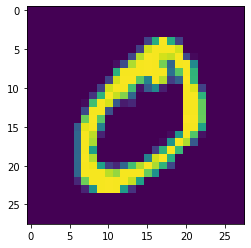

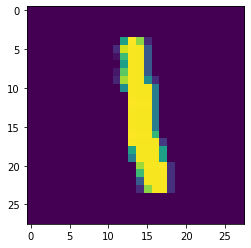

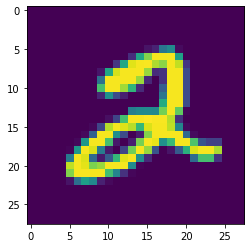

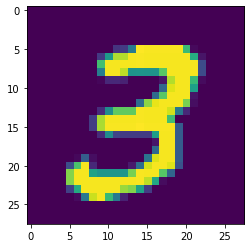

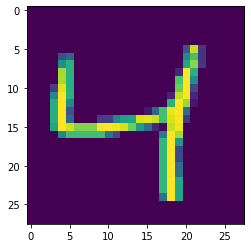

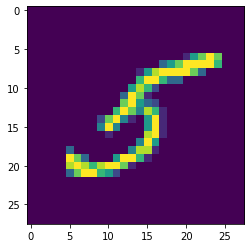

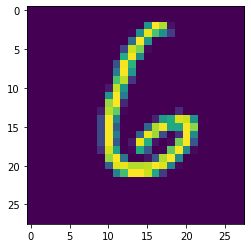

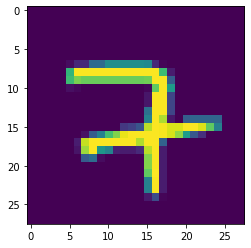

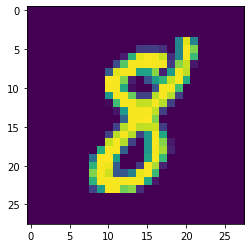

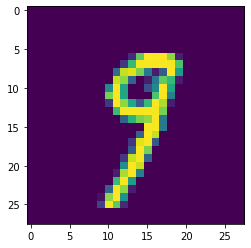

In [124]:
# Dibujemos algunos dígitos
import matplotlib.pyplot as plt
pa_ver = [1, 6, 5, 7, 2, 35, 32, 38, 41, 43]
for i in pa_ver:
    z = x['data'][i].reshape((28,28))
    plt.imshow(z)
    plt.show()

## Parte 1: Generación de contenido usando GMM y PCA

Vamos a utilizar PCA y GMM en conjunto para generar contenido similar a MNIST.

Los pasos de entrenamiento serán los siguientes:

1. Tomar una muestra del 10% (7,000 filas) de MNIST 
2. Entrenar PCA sobre la muestra
3. Utilizar PCA para transformar la muestra en un dataset de menor dimensionalidad
4. Entrenar GMM con el dataset de dimensiones reducidas

Una vez entrenados los modelos, utilizaremos el siguiente procedimiento para generar nuevas imágenes:

1. Obtener una imágen de la GMM, en el espacio de dimensionalidad reducida
2. Utilizar la transformación inversa de PCA para obtener la imágen completa

In [84]:
# Problema 1.1 (PUNTUACIÓN: 1 punto). 
# ==> Tomar una muestra reducida de tamaño 7000, sin reemplazo
import numpy as np
indices_muestra = np.random.choice (x['data'].shape[0], size=7000, replace=False)

x_muestra = x['data'][indices_muestra]

x_muestra.shape
# debe dar (7000, 784)

(7000, 784)

In [116]:
# Problema 1.2 (PUNTUACIÓN: 2 puntos). 
# ==> Entrenar PCA con esta muestra para conservar el 98% de la varianza en los componentes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ==> Utilizar el modelo PCA entrenado para transformar dicha muestra 
# Entrenamos PCA sin reducir
X_s = StandardScaler().fit_transform(x_muestra)
pca = PCA()
pca.fit(X_s)

# Obtenemos R y P
R = pca.components_
P = pca.transform(X_s)
print(R.shape)
print(P.shape)

(784, 784)
(7000, 784)


**Notas importantes sobre las mixturas gaussianas**:
1. Los estudiantes son libres de escoger entre una mixtura gaussiana convencional y una bayesiana
2. Deben encontrar un número de componentes de mixtura apropiado para generar imágenes realistas
3. Este número puede variar mucho, pero un número apropiado entre ``2`` y el número de dimensiones reducidas (disponible como ``x_pca.shape[a]``)

In [120]:
# Problema 1.3 (PUNTUACIÓN: 3 puntos)
# ==> Entrenar un modelo de mixtura gaussiana sobre los datos transformados, encontrar un número apropiado de componentes
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

bgmm = BayesianGaussianMixture(n_components=10, max_iter=1000)
bgmm.fit(x_pca)

BayesianGaussianMixture(max_iter=1000, n_components=10)

In [121]:
# Problema 1.4 (PUNTUACIÓN: 2 puntos)
# ==> Definir la función que produce una imágen de la GMM, la re-escala y la deja en tamaño 28x28
def generar_imagen():
    sample = bgmm.sample(1)[0]

    return pca.inverse_transform(sample).reshape((28,28))

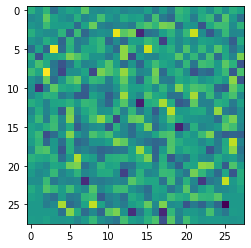

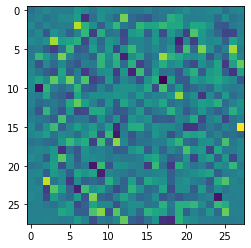

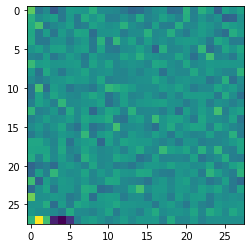

In [122]:
### CODIGO PARA PROBAR SUS MODELOS ###
plt.imshow(generar_imagen())
plt.show()
plt.imshow(generar_imagen())
plt.show()
plt.imshow(generar_imagen())
plt.show()

## Parte 2: t-SNE sobre MNIST

Haremos algo de exploración de datos con MNIST. Obtendremos una muestra de 1,000 valores y conservaremos las etiquetas (para dibujarlas con colores en el espacio reducido).

In [135]:
# Muestra
x_muestra2 = np.random.choice(x['data'].shape[0], size=1000, replace=False)

# Imágenes
x_im2 = x['data'][x_muestra2]

# Etiquetas transformadas en escala RGBA
x_lab2 = np.array([cm.tab10((float(z) / 9)) for z in x['target'][x_muestra2]]).reshape((1000,4))

NameError: name 'cm' is not defined

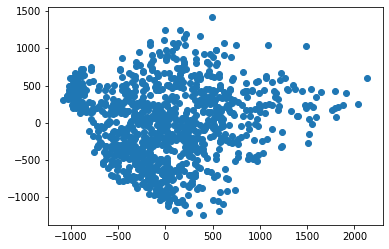

In [131]:
# Problema 2.1 (PUNTUACIÓN: 1 punto): Transformar con PCA y dibujar 
x_pca2 = PCA(n_components=2).fit_transform(x_im2) # TODO: reemplazar XXX
plt.scatter(x_pca2[:,0], x_pca2[:,1])
plt.show()

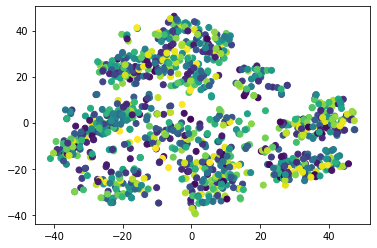

In [132]:
# Problema 2.2 (PUNTUACIÓN: 1 punto): Transformar con T-SNE y dibujar 
from sklearn.manifold import TSNE
x_tsne2 = TSNE(n_components=2).fit_transform(x_im2)
plt.scatter(x_tsne2[:,0], x_tsne2[:,1], c=x_muestra2)
plt.show()